<a href="https://colab.research.google.com/github/Jhugo01/Classificador/blob/main/Biblioteca_de_importa%C3%A7%C3%A3o_e_conjunto_de_dados_de_carga_04_11_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from pandas.plotting import parallel_coordinates

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
from sklearn import metrics

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.linear_model import LogisticRegression

# Para carregar o conjunto de dados usar a função read_csvde pandas(meu código também inclui a opção de carregar de url)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset_iris/Iris.csv')

In [ ]:
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [ ]:
train, test = train_test_split(data,test_size = 0.4, stratify = data['Species'], random_state =42)

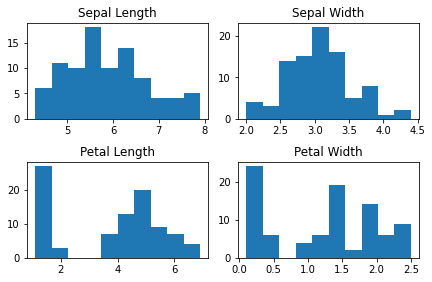

In [ ]:
n_bins = 10
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(train['SepalLengthCm'], bins = n_bins);
axs[0,0].set_title('Sepal Length');
axs[0,1].hist(train['SepalWidthCm'], bins = n_bins);
axs[0,1].set_title('Sepal Width');
axs[1,0].hist(train['PetalLengthCm'], bins = n_bins);
axs[1,0].set_title('Petal Length');
axs[1,1].hist(train['PetalWidthCm'], bins = n_bins);
axs[1,1].set_title('Petal Width');
# add some spacing between subplots
fig.tight_layout(pad=1.0);

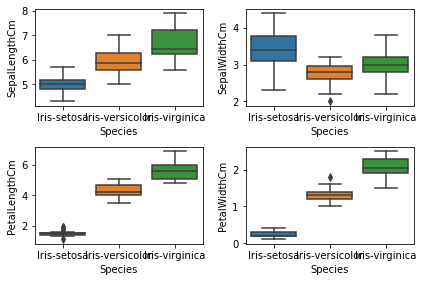

In [ ]:
fig, axs = plt.subplots(2, 2)
fn = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
cn = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
sns.boxplot(x = 'Species', y = 'SepalLengthCm', data = train, order = cn, ax = axs[0,0]);
sns.boxplot(x = 'Species', y = 'SepalWidthCm', data = train, order = cn, ax = axs[0,1]);
sns.boxplot(x = 'Species', y = 'PetalLengthCm', data = train, order = cn, ax = axs[1,0]);
sns.boxplot(x = 'Species', y = 'PetalWidthCm', data = train,  order = cn, ax = axs[1,1]);
fig.tight_layout(pad=1.0);

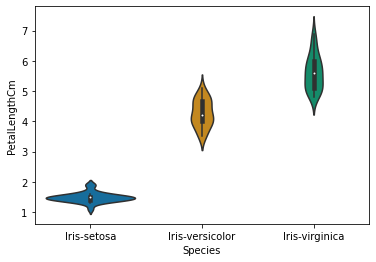

In [ ]:
sns.violinplot(x="Species", y="PetalLengthCm", data=train, size=5, order = cn, palette = 'colorblind');

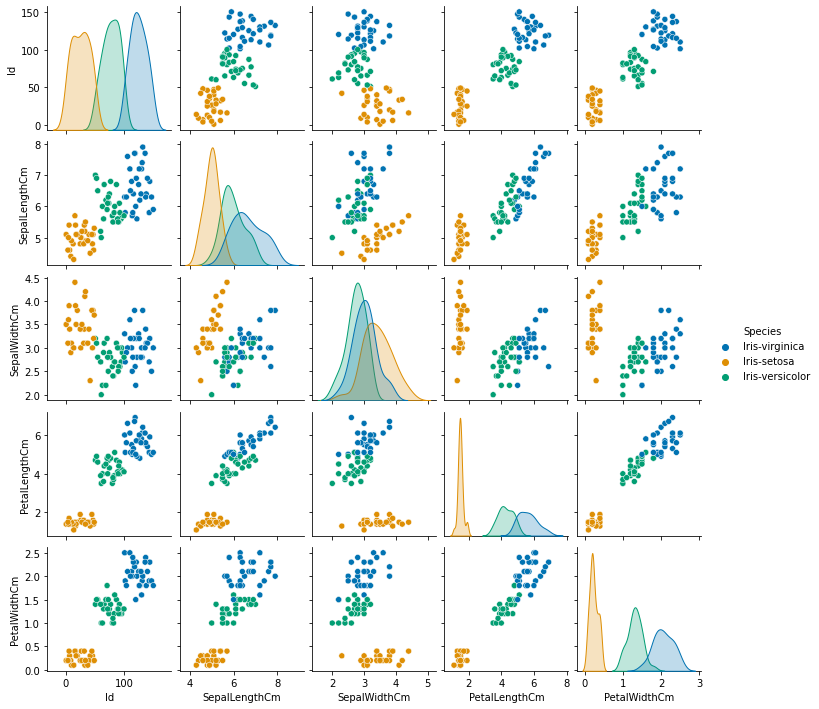

In [ ]:
sns.pairplot(train, hue="Species", height = 2, palette = 'colorblind');

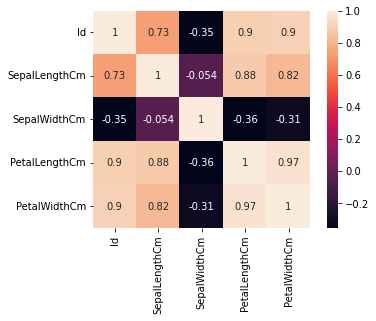

In [ ]:
corrmat = train.corr()
sns.heatmap(corrmat, annot = True, square = True);

In [ ]:
X_train = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y_train = train.Species
X_test = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y_test = test.Species

In [ ]:
mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
mod_dt.fit(X_train,y_train)
prediction=mod_dt.predict(X_test)
print('A acurácia da nossa classificação é de:',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))



A acurácia da nossa classificação é de: 0.983


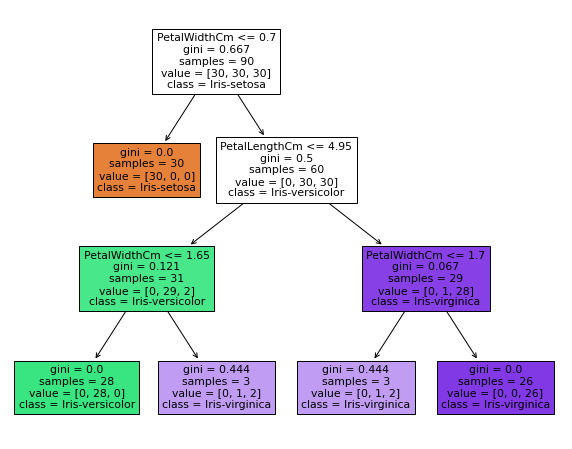

In [ ]:
plt.figure(figsize = (10,8))
plot_tree(mod_dt, feature_names = fn, class_names = cn, filled = True);